import csv
import math
import itertools
import numpy as np
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
from statsmodels import robust
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [1]:
import csv
import math
import itertools
import numpy as np
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
from statsmodels import robust
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [1]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [3]:
def csv_reader(file_obj):
    reader = csv.reader(file_obj)
    testArray=np.empty((0,4), float)
    testArrayLabel=np.empty((0,1),float)
    for row in reader:
        testArray=np.vstack((testArray,[float(row[0]),float(row[1]),float(row[2]),float(row[3])]))
        testArrayLabel=np.append(testArrayLabel,[float(row[4])])
    return testArray,testArrayLabel

In [4]:
def generateFeatures(Temp):
    f0=np.mean(Temp[:,0])
    f1=np.mean(Temp[:,1])
    f2=np.mean(Temp[:,2])
    f3=np.std(Temp[:,0])
    f4=np.std(Temp[:,1])
    f5=np.std(Temp[:,2])
    f6=np.var(Temp[:,0])
    f7=np.var(Temp[:,1])
    f8=np.var(Temp[:,2])
    f9=robust.mad(Temp[:,0])
    f10=robust.mad(Temp[:,1])
    f11=robust.mad(Temp[:,2])
    f12=abs(np.mean(Temp[:,0])-np.mean(Temp[:,1]))
    f13=abs(np.mean(Temp[:,0])-np.mean(Temp[:,2]))
    f14=abs(np.mean(Temp[:,1])-np.mean(Temp[:,2]))
    return [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14]

In [5]:
"""Dictionaries are created and accumulated in CSV files."""
dictTrainData = {}
dictTrainLabel = {}
if __name__ == "__main__":
    for i in range(1,17):   #Range del 1 al 7 dado que actualmente se encuentran 16 archivos CSV    
        csv_path = str(i)+".csv"
        with open(csv_path, "rb") as f_obj:
            trainingData,trainingLabel=csv_reader(f_obj)
            dictTrainData[i]=trainingData
            dictTrainLabel[i]=trainingLabel

"""dictionaries are converted into numpy vectors / arrays to be processed"""
trainDataGroup=np.empty((0,4),float)
trainLabelGroup=np.empty((0,1),int)

for key in dictTrainData:
    trainDataGroup=np.vstack((trainDataGroup,dictTrainData[key]))
    trainLabelGroup=np.append(trainLabelGroup,dictTrainLabel[key])

In [6]:
print (trainDataGroup)
print len(trainDataGroup)

[[  1.    -0.57   0.53  -1.03]
 [  1.    -0.57   0.54  -1.04]
 [  1.    -0.56   0.54  -1.03]
 ..., 
 [ 16.    -0.35   0.22  -0.93]
 [ 16.    -0.45   0.13  -0.97]
 [ 16.    -0.35   0.2   -0.87]]
68660


In [7]:
"""For the processing of the data, two things are required beforehand. 
1) Group the data in one-second intervals y 2) Group by activity"""

ExactDataGroup=np.empty((0,3),float)
ExactLabelGroup=np.empty((0,1),int)

TempData=np.empty((0,3),float)
TempLabel=np.empty((0,1),int)

count=0

for i in range(1,int(max(trainDataGroup[:,0]))+1):
    for ii in range(0,len(trainDataGroup)):
        if(trainDataGroup[ii,0]==i):
            TempData=np.vstack((TempData,[trainDataGroup[ii,1],trainDataGroup[ii,2],trainDataGroup[ii,3]]))
            TempLabel=np.append(TempLabel,trainLabelGroup[ii])
            count=count+1
            if (count==25):
                ExactDataGroup=np.vstack((ExactDataGroup,TempData))
                ExactLabelGroup=np.append(ExactLabelGroup,TempLabel)
                TempData=np.empty((0,3),float)
                TempLabel=np.empty((0,1),int)
                count=0
        else:
            TempData=np.empty((0,3),float)
            TempLabel=np.empty((0,1),int)
            count=0
            
            

In [8]:
"""Para sacar los features. Se tienen 8== [Media Desviacion Varianza Entropia Kurtosis MAD Correlacion] per Axis and Distance"""
features=np.empty((0,15),float)#Deberia ser (0,18)
labels=np.empty((0,1),int)
for i in range (0,(len(ExactDataGroup)/25)):
    Temp=ExactDataGroup[25*(i):25*(i+1),:]
    features=np.vstack((features, generateFeatures(Temp)))
    labels=np.append(labels, ExactLabelGroup[i*25])

In [9]:
"""The feature and label vectors are randomly exchanged for the purpose of training and testing the classifier"""
featuresShuffle,labelsShuffle = unison_shuffled_copies(features,labels)
TrainFeatures,TestFeatures,TrainLabels,TestLabels=train_test_split(featuresShuffle,labelsShuffle,test_size=0.3)

In [16]:
print(len(TrainFeatures))

1917


In [11]:
# Random Forest 
"""Implementation of Random Forest and importance of each Feature"""
FeaturesNames = ['0) mean x', '1) mean y', '2) mean z', '3) Standar deviation x','4) Standar deviation y',
                 '5) Standar deviation z','6) Variance x', '7) Variance y','8) Variance z', '9) MAD x',
                 '10) MAD y', '11) MAD z','12) mean(x-y)', '13) mean(x-z)', '14) mean (y-z)'];
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)
clf = clf.fit(TrainFeatures, TrainLabels)

In [18]:
#with open('RF.pickle','wb') as f:
#    pickle.dump(clf,f)
print(clf.apply(TestFeatures))

[[134 127 159 ..., 151 112 136]
 [ 19  15  28 ...,  22   8  22]
 [  3   3   3 ...,   2   2   3]
 ..., 
 [ 13  96  30 ...,  44  81  29]
 [  3   3   3 ...,   2   2   3]
 [ 66  50  11 ...,  26  38  79]]


Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.979


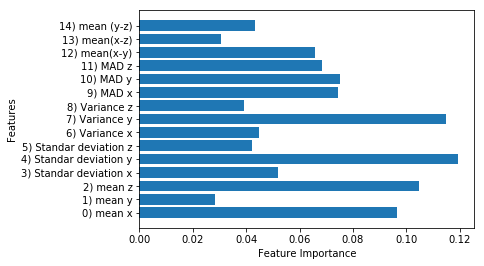

Features ranking:
0. feature 4 (0.119532)
1. feature 7 (0.115031)
2. feature 2 (0.104680)
3. feature 0 (0.096608)
4. feature 10 (0.075211)
5. feature 9 (0.074245)
6. feature 11 (0.068295)
7. feature 12 (0.065845)
8. feature 3 (0.052105)
9. feature 6 (0.044790)
10. feature 14 (0.043173)
11. feature 5 (0.042148)
12. feature 8 (0.039331)
13. feature 13 (0.030515)
14. feature 1 (0.028491)


In [12]:
"Visualization of results"
print('Accuracy on the training subset: {:.3f}'.format(clf.score(TrainFeatures,TrainLabels)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(TestFeatures,TestLabels)))
n_features = featuresShuffle.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align ='center')
plt.yticks(np.arange(n_features), FeaturesNames)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Features ranking:")

for f in range(n_features):
    print("%d. feature %d (%f)" % (f, indices[f], importances[indices[f]]))

In [ ]:
#KNN classifier
"Create two lists for training and test accuracies"
training_accuracy = []
test_accuracy = []

"Define a range of 1 to 50 (included) neighbors to be tested"
neighbors_settings = range(1,51)

"Loop with the KNN through the different number of neighbors to determine the most appropriate (best) and choose the one with the greatest test accuracy"
greatest_accuracy=0
greatest_neighbors = 0
for n_neighbors in neighbors_settings:
    clf_2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_2 = clf_2.fit(TrainFeatures, TrainLabels)
    training_accuracy.append(clf_2.score(TrainFeatures, TrainLabels))
    test = clf_2.score(TestFeatures,TestLabels)
    test_accuracy.append(test)
    if test > greatest_accuracy:
        greatest_accuracy = test
        greatest_neighbors = n_neighbors

print('The number of neighbors for the best test accuracy: {:.0f}'.format(greatest_neighbors))
print('The best test accuracy is: {:.4f}'.format(greatest_accuracy))

"Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=50, in this case)"
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()






In [ ]:
print(greatest_accuracy)
for row in features:
    print(row)

In [ ]:
# Naive Bayes
clf_3 = GaussianNB()
clf_3 = clf_3.fit(TrainFeatures, TrainLabels)
GaussianNB(priors=None)
print('Accuracy on the training subset: {:.3f}'.format(clf_3.score(TrainFeatures,TrainLabels)))
print('Accuracy on the test subset: {:.3f}'.format(clf_3.score(TestFeatures,TestLabels)))
